# Forecasting Future Long-Run Stock Returns with Robert Shiller's Cyclically Adjusted Price-Earnings Ratio (CAPE)

To use this notebook, click "Runtime" in the menu above, then choose "Run all" which will run all the code below from top to bottom. 

In [1]:
import requests
r = requests.get('https://raw.githubusercontent.com/nathanramoscfa/cape/main/cape/cape.py')
with open('cape.py', 'w') as f:
  f.write(r.text)
import cape

## Results Ranked by Forward Return 5-Year Forecast

These ETFs have an expected annualized 5-year return greater than 15%. 

In [2]:
cape.print_data_date()

Data current as of: 10-31-2022


In [3]:
cape.forward_return_forecast(breakpoint_return=0.15, above=True, top=None, drop_duplicates=False)

ETFs with above 0.15% expected forward 5-year return:


,ETF_NAME,INDEX_NAME,CAPE,FWD_RETURN_5Y_FORECAST,LOWER_CONFIDENCE,UPPER_CONFIDENCE,INDEX_TICKER
TICKER,,,,,,,
PSCD,Invesco S&P SmallCap Consumer Discretionary ETF,S&P 600 Consumer Discretionary Sector,12.92,0.2201,0.1059,0.3356,S6COND
IJT,iShares S&P Small-Cap 600 Growth ETF,S&P Small Cap 600 Growth,24.30,0.1773,0.1045,0.2514,SMLG
SLYG,SPDR S&P 600 Small Cap Growth ETF,S&P Small Cap 600 Growth,24.30,0.1773,0.1045,0.2514,SMLG
VIOG,Vanguard S&P Small-Cap 600 Growth ETF,S&P Small Cap 600 Growth,24.30,0.1773,0.1045,0.2514,SMLG
IJR,iShares Core S&P Small-Cap ETF,S&P Small Cap 600,17.99,0.1734,0.1051,0.2411,SML
FYX,First Trust Small Cap Core AlphaDEX Fund,S&P Small Cap 600,17.99,0.1734,0.1051,0.2411,SML
SLY,SPDR S&P 600 Small CapETF,S&P Small Cap 600,17.99,0.1734,0.1051,0.2411,SML
SPSM,SPDR Portfolio S&P 600 Small Cap ETF,S&P Small Cap 600,17.99,0.1734,0.1051,0.2411,SML
VIOO,Vanguard S&P Small-Cap 600 ETF,S&P Small Cap 600,17.99,0.1734,0.1051,0.2411,SML


These ETFs have an expected annualized 5-year return loss. 

In [4]:
cape.forward_return_forecast(breakpoint_return=0.0, above=False, top=None, drop_duplicates=False)

ETFs with below 0.0% expected forward 5-year return:


,ETF_NAME,INDEX_NAME,CAPE,FWD_RETURN_5Y_FORECAST,LOWER_CONFIDENCE,UPPER_CONFIDENCE,INDEX_TICKER
TICKER,,,,,,,
OIH,VanEck Oil Services ETF,Philadelphia Stock Exchange Oil Service Sector,8.57,-0.1787,-0.4225,0.0651,OSX
IUSV,iShares Core S&P U.S. Value ETF,S&P 500 Value,21.39,-0.0256,-0.1135,0.0616,SVX
IVE,iShares S&P 500 Value ETF,S&P 500 Value,21.39,-0.0256,-0.1135,0.0616,SVX
SPYV,SPDR Portfolio S&P 500 Value ETF,S&P 500 Value,21.39,-0.0256,-0.1135,0.0616,SVX
VOOV,Vanguard S&P 500 Value ETF,S&P 500 Value,21.39,-0.0256,-0.1135,0.0616,SVX
FUTY,Fidelity MSCI Utilities Index ETF,MSCI USA Utilities,19.32,-0.0036,-0.1072,0.1002,MXUS0UT
IDU,iShares US Utilities ETF,MSCI USA Utilities,19.32,-0.0036,-0.1072,0.1002,MXUS0UT
VPU,Vanguard Utilities ETF,MSCI USA Utilities,19.32,-0.0036,-0.1072,0.1002,MXUS0UT
XLU,Utilities Select Sector SPDR Fund,MSCI USA Utilities,19.32,-0.0036,-0.1072,0.1002,MXUS0UT


## ETF Single Ticker Results Lookup

Pull up forecast data on a single ETF ticker.

In [5]:
cape.available_tickers()

Available ETF tickers: 

ACWI BBRE BBUS BKLC BKSE CRBN DIA DVY ESGU ESML
FAS FDIS FENY FIDU FMAT FNCL FRI FSTA FTEC FUTY
FYX GSUS IDU IJH IJJ IJK IJR IJS IJT ILCB
ILCG IMCB ITOT IUSV IVE IVOO IVOV IVV IWB IWD
IWF IWL IWM IWN IWP IWR IWS IWV IXC IXN
IYE IYH IYW IYY JHML JHMM JHSC JUST KBWB KOKU
MDY MDYG MDYV MGK NUSC OEF OIH ONEQ OVL PBSM
PSCD PSCT QLD QQQ RWR SCHA SCHB SCHG SCHK SCHV
SCHX SH SLY SLYG SLYV SMH SMMD SNPE SOXL SOXX
SPLG SPMD SPSM SPXL SPY SPYV SPYX SQQQ SSO SSPY
TECL TMFC TNA TOK TQQQ UPRO URTH USRT VAW VB
VDC VDE VFH VGT VIOG VIOO VIOV VIS VO VONE
VONG VONV VOO VOOV VOT VPU VT VTI VTWO VTWV
VUG VV XHB XLB XLE XLF XLG XLI XLK XLU
XLV XME XOUT


## Results for ETF

In [6]:
etf_ticker = 'PSCD'

In [7]:
cape.ticker_results(etf_ticker)

ETF_NAME                  Invesco S&P SmallCap Consumer Discretionary ETF
INDEX_NAME                          S&P 600 Consumer Discretionary Sector
CAPE                                                                12.92
FWD_RETURN_5Y_FORECAST                                             0.2201
LOWER_CONFIDENCE                                                   0.1059
UPPER_CONFIDENCE                                                   0.3356
INDEX_TICKER                                                       S6COND
Name: PSCD, dtype: object
Expected 5-Year Return (S&P 600 Consumer Discretionary Sector): 22.01%


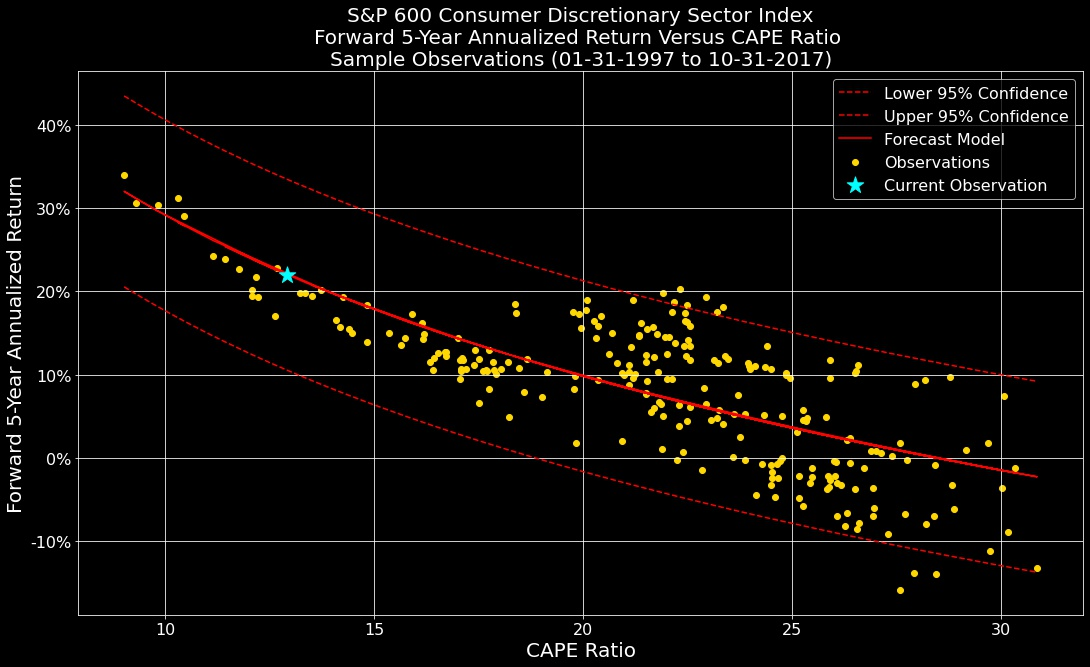

In [14]:
from IPython.display import Image, display
display(Image('https://raw.githubusercontent.com/nathanramoscfa/cape/main/django_apps/mysite/forecast/static/forecast/images/sample_regression_{}.jpg'.format(cape.forecast_data().loc[etf_ticker]['INDEX_TICKER'])))

In [8]:
cape.chart(etf_ticker, chart_num=1)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

In [9]:
cape.chart(etf_ticker, chart_num=2)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

In [10]:
cape.chart(etf_ticker, chart_num=3)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

In [11]:
cape.chart(etf_ticker, chart_num=4)

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

In [12]:
cape.chart(etf_ticker, chart_num=5)

ValueError: ignored